In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

events = pd.read_csv('datos/events.csv.gzip', compression = 'gzip')
events.head()

/home/manu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,"224,815,696,425,431,552.00","5,516,623,012,570,945,536.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,7858558567428669000,"407,706,219,895,259,712.00"
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,1cd98205-0d97-4ec2-a019-667997dbfe7a,"224,815,696,425,431,552.00","997,766,018,131,693,568.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,7858558567428669000,"407,706,219,895,259,712.00"
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,f02e2924-21ae-492b-b625-9021ae0a4eca,"224,815,696,425,431,552.00","5,516,623,012,570,945,536.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,7858558567428669000,"407,706,219,895,259,712.00"
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,a813cf45-a36e-4668-85e2-5395f1564e98,"224,815,696,425,431,552.00","8,561,152,834,701,073,408.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,6324037615828123965,"407,706,219,895,259,712.00"
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,"7,391,843,585,977,942,016.00",nan,"5,960,895,846,746,644,480.00",...,NaN,nan,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,"224,815,696,425,431,552.00","873,190,165,761,955,328.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,2894495631302821483,"3,301,377,775,977,699,840.00"


In [4]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [5]:
events['event_id'].value_counts().count()

568

 568 != 2494423 (len(eventos)) Esto me dice que el event_id es el "tipo" de evento. Pueden suceder en distintas ocasiones. Pero cada vez que genero un evento no genero un id nuevo.

Algo similar sucede con application_id

In [6]:
events['event_uuid'].value_counts().count()

2489324

Pareciera que event_uuid es unico para cada evento generado... Pero hay algunos que no tienen valor. Por que?

In [7]:
events['event_uuid'].isnull().sum().sum()

5099

## Porcentaje de eventos atribuidos a Jampp

In [8]:
cantidad_eventos_atribuidos_a_Jampp = events['attributed'].sum()
cantidad_eventos_atribuidos_a_Jampp

5099

Es la misma cantidad!! De eventos con id Nulls y los que fueron atribuidos a Jampp

In [9]:
cantidad_eventos_atribuidos_a_Jampp = float(events['attributed'].sum())
total_eventos = len(events['attributed'])
(cantidad_eventos_atribuidos_a_Jampp) / (total_eventos) * 100

0.20441601123786943

~ 0.2% es el porcentaje de eventos atribuidos a Jampp

In [10]:
df = events[['attributed','event_uuid']]
es_atribuido = df['attributed'] == True

In [11]:
df_filtrado = df[es_atribuido]

In [12]:
df.head()

,attributed,event_uuid
0,False,a9c0b263-acb2-4577-92c5-cbde5d7a5db1
1,False,1cd98205-0d97-4ec2-a019-667997dbfe7a
2,False,f02e2924-21ae-492b-b625-9021ae0a4eca
3,False,a813cf45-a36e-4668-85e2-5395f1564e98
4,False,63a4f0aa-e147-469f-8c55-4ca4f8d0e310


In [13]:
df_filtrado.head()

,attributed,event_uuid
11150,True,NaN
11151,True,NaN
11152,True,NaN
31408,True,NaN
31482,True,NaN


In [14]:
df_filtrado['event_uuid'].isnull().sum().sum()

5099

In [15]:
len(df_filtrado)

5099

Evidentemente todos los eventos que son atribuidos a Jampp no tienen ningun uuid

## Eventos distribuidos a lo largo del dia

In [16]:
events['date'] = pd.to_datetime(events['date'])

In [17]:
events['year'] = events['date'].dt.year

In [18]:
events['year'].value_counts()

2019    2494423
Name: year, dtype: int64

Todos los eventos se suceden en el 2019

In [19]:
events['hour'] = events['date'].dt.hour

Text(0, 0.5, 'Cantidad')

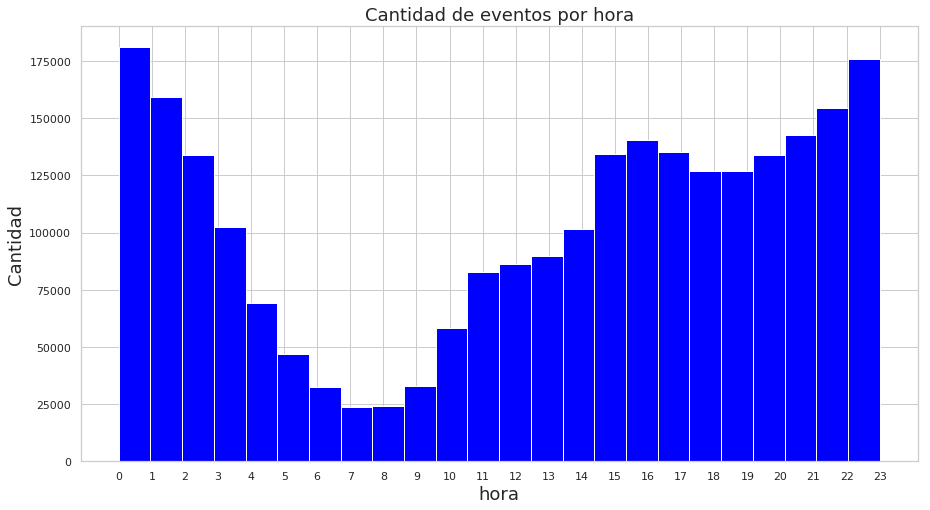

In [20]:
grafico_hora = events['hour'].plot.hist(bins = 24, color = 'blue', figsize = (15,8))
grafico_hora.set_title('Cantidad de eventos por hora', fontsize = 18)
plt.xticks( [n for n in range(0,24,1)])
grafico_hora.set_xlabel('hora', fontsize = 18)
grafico_hora.set_ylabel('Cantidad', fontsize = 18)

La mayor cantidad de eventos se generan en la tarde noche. A partir de las 00hs decaen, posiblemente debido a que la gente esta durmiendo 

## Depende del dia de la semana la cantidad de eventos

In [29]:
events['weekday'] = events['date'].dt.weekday

Text(0, 0.5, 'Cantidad')

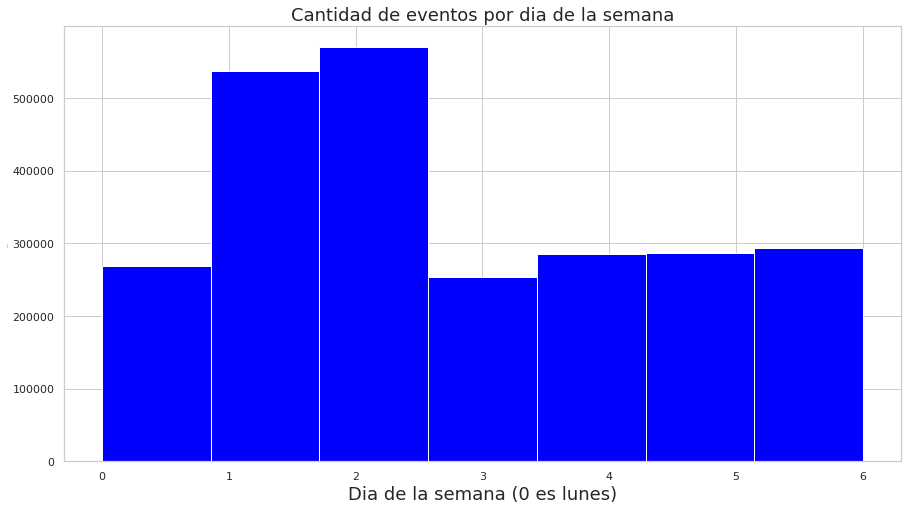

In [32]:
grafico_dia = events['weekday'].plot.hist(bins = 7, color = 'blue', figsize = (15,8))
grafico_dia.set_title('Cantidad de eventos por dia de la semana', fontsize = 18)
grafico_dia.set_xlabel('Dia de la semana (0 es lunes)', fontsize = 18)
grafico_dia.set_ylabel('Cantidad', fontsize = 1)

Tenemos un pico el martes y el miercoles. Igual que en el caso de instalaciones

# Aplicaciones y usuarios

In [21]:
events['ref_hash'].value_counts()

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
7932055701089699678    1880
959309904051180368     1879
2172957424689981672    1737
8938936221115319274    1712
5517347051664000025    1696
7881865551295335841    1680
2911380620292361100    1615
7984059267284799536    1599
3931396627810108588    1558
5929807100024800254    1460
8291491622395815056    1431
6431911391083614553    1398
6290225060459708362    1384
1392381574052047210    1369
524370095063968889     1355
5639133576747886119    1345
2456256724056711249    1339
8847676025636425100    1336
3436575239155975568    1317
6630253456783010456    1312
                       ... 
157629049434270787        1
2404462553287446258       1
9194020315316075441       1
7813739129937447890       1
7252925027847170864 

In [22]:
events['ref_hash'].value_counts().count()

196049

In [23]:
events['application_id'].value_counts().count()

269

Tengo 196049 usuarios DISTINTOS generando eventos en 269 aplicaciones distinas...

## Aplicaciones que mas eventos generan (mas usadas?)

Me interesaria ver en un grafico la distribucion de eventos en cantidad en cada aplicacion que hay

Tal grafico es imposible porque son demasiadas apps

In [37]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
127         3
62          3
232         3
91          3
135         2
36          2
290         2
49          2
11          2
228         2
209         2
206         2
117         2
188         2
81          2
322         1
25          1
86          1
132         1
146         1
155         1
158         1
165         1
240         1
245         1
255         1
286         1
295         1
305         1
154         1
Name: application_id, Length: 269, dtype: int64

## Aplicaciones con mayor cantidad de usuarios

Podemos ver las aplicaciones que más eventos generan. También sería interesante ver que aplicaciones son las que más usuarios distintos usan

In [25]:
(events['ref_hash'].value_counts() == 1).sum()

36838

36838 es la cantidad de usuarios que generan 1 solo evento en alguna aplicacion... Por que alguien generaria solamente un evento...?

In [26]:
((events['ref_hash'].value_counts() == 1).sum())/len(events)*100

1.4768144777369354

Representan solo el 1,5%... 

In [35]:
events_per_app = events.groupby('application_id').agg({'ref_hash':'nunique'})
events_per_app.columns = [ 'total_users']
events_per_app.nlargest(10, 'total_users')

,total_users
application_id,
66,70312
63,18419
145,17576
64,17007
103,15053
170,9739
212,6198
7,4780
182,4711


In [28]:
events.groupby('application_id')['ref_hash'].nunique().sort_values(ascending = False).head(10)

application_id
66     70312
63     18419
145    17576
64     17007
103    15053
170     9739
212     6198
7       4780
182     4711
10      3974
Name: ref_hash, dtype: int64

Así podemos ver las aplicaciones que mas eventos de distintos usuarios producen. No difiere mucho de las aplicaciones que más eventos producen en general